<center><h1>COMMERCIAL AIRCRAFT ACCIDENTS PREDICTION PROJECT</h1></center>

<center><h2>PROJECT DESCRIPTION</h2></center>

<h3>Every day approximately over 100,000 Commercial Aircrafts are carrying millions of passengers across the globe<br>Accidents, although they are very rare, but when they happen they are very devastating.</br><br>
    
It is therefore prudent that data scientists across the globe come up with a prediction model(s)<br> that predicts the accidents before they happen.</br>
    
However, the scope of this project is to determine the Commercial Aircrafts with low risk of<br> accidents for the head aviation department to procure ones not vulnerable to accidents.</br> 

<h2><center>PROJECT OVERVIEW</h2></center>

<h3><center>Python Data cleaning and analysis</center></h3><br><b>1.0 Importing our libraries</br>


In [1]:

# importing the pandas libraries

import pandas as pd
# importing the numpy library
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<h3>1.1 Reading the Dataset from our CSV file</h3>

In [2]:

# Let read the data from the CSV file and create the dataframe to be used
#
df = pd.read_csv("AviationData.CSV", encoding="latin-1",low_memory=False)
df.head()


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


<h3>1.2 Previewing our Dataste</h3>

In [3]:
# lets preview the first 5 rows of our dataset
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


<h3>1.3 Acessing information about our Dataset</h3> 

In [4]:
# accessing information about our dataset
#
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

<h3>1.4 Cleaning our Dataset</h3>

In [5]:
df1=df.copy(deep=True)
df1

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


<h3> 1.4:1 Validity Challenges</h3>

In [6]:
# procedure 1: irrelevant data observation
# Data cleaning action: Dropping
df.drop(["Latitude","Longitude","Airport.Code","Airport.Name"], axis=1, inplace =True)
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NaN,NC6404,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,NaN,N5069P,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,NaN,N5142R,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,NaN,N1168J,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,NaN,N15NY,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [7]:
# procedure 2: irrelevant data observation
# Data cleaning action: Dropping
df.drop(["Registration.Number","Schedule","Purpose.of.flight","Publication.Date","Report.Status"], axis=1, inplace =True)
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,...,Number.of.Engines,Engine.Type,FAR.Description,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NaN,Stinson,...,1.0,Reciprocating,NaN,NaN,2.0,0.0,0.0,0.0,UNK,Cruise
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,NaN,Piper,...,1.0,Reciprocating,NaN,NaN,4.0,0.0,0.0,0.0,UNK,Unknown
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,NaN,Cessna,...,1.0,Reciprocating,NaN,NaN,3.0,NaN,NaN,NaN,IMC,Cruise
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,NaN,Rockwell,...,1.0,Reciprocating,NaN,NaN,2.0,0.0,0.0,0.0,IMC,Cruise
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,NaN,Cessna,...,NaN,NaN,NaN,NaN,1.0,2.0,NaN,0.0,VMC,Approach


<h3>1.42 Accuracy challenges</h3>

In [8]:
# procedure 1
# Data cleaning Action: Cleaning outliers
# Explanation: this helps in accuracy
# Checking outliers using matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

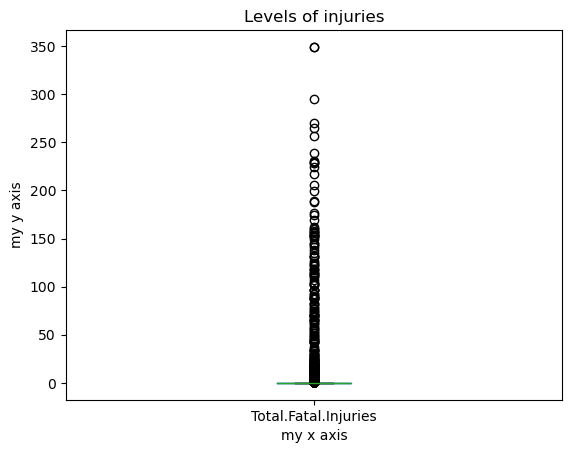

In [9]:
df.boxplot(["Total.Fatal.Injuries"],grid=False)
plt.title("Levels of injuries")
plt.xlabel("my x axis")
plt.ylabel("my y axis")
plt.show()

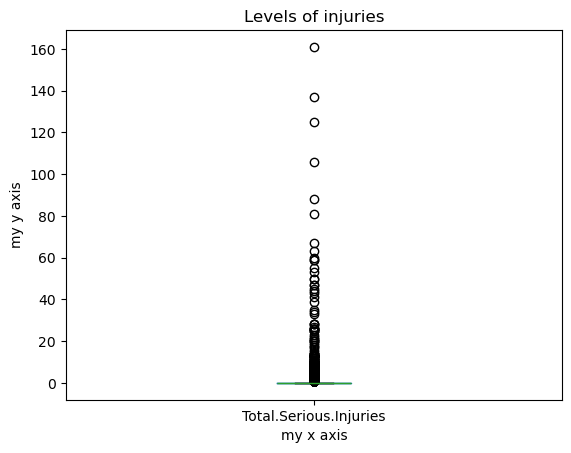

In [10]:
df.boxplot(["Total.Serious.Injuries"],grid=False)
plt.title("Levels of injuries")
plt.xlabel("my x axis")
plt.ylabel("my y axis")
plt.show()

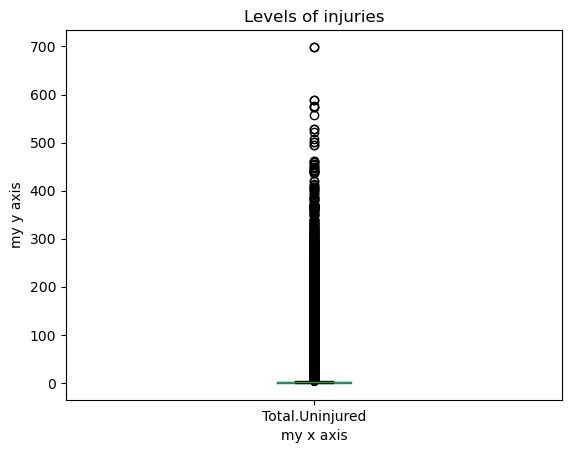

In [11]:
df.boxplot(["Total.Uninjured"],grid=False)
plt.title("Levels of injuries")
plt.xlabel("my x axis")
plt.ylabel("my y axis")
plt.show()

<h3> <b> 1.43 Completeness challenges </h3>

In [12]:
# procedure 1
# Data cleaning action: Checking the missing values
# Explanation: this ensures the data is complete
# Checking missing values
df.isnull().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
FAR.Description           56866
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
dtype: int64

In [13]:
# procedure 2
# Data cleaning action: dropping missing values
# Explanation: for the credibility of the Dataset
clean_df=df.dropna(how="all")
clean_df[:4]

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,...,Number.of.Engines,Engine.Type,FAR.Description,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NaN,Stinson,...,1.0,Reciprocating,NaN,NaN,2.0,0.0,0.0,0.0,UNK,Cruise
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,NaN,Piper,...,1.0,Reciprocating,NaN,NaN,4.0,0.0,0.0,0.0,UNK,Unknown
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,NaN,Cessna,...,1.0,Reciprocating,NaN,NaN,3.0,NaN,NaN,NaN,IMC,Cruise
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,NaN,Rockwell,...,1.0,Reciprocating,NaN,NaN,2.0,0.0,0.0,0.0,IMC,Cruise


<h3> <b>1.44 Consistency Challenges </h3>

In [14]:
# Checking for duplicates
clean_df.duplicated().any()

True

In [15]:
# Procedure 1: Duplicates
# Data cleaning action: drop the duplicates
clean_df1=clean_df.drop_duplicates(keep="last", inplace=False)
clean_df1

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,...,Number.of.Engines,Engine.Type,FAR.Description,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NaN,Stinson,...,1.0,Reciprocating,NaN,NaN,2.0,0.0,0.0,0.0,UNK,Cruise
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,NaN,Piper,...,1.0,Reciprocating,NaN,NaN,4.0,0.0,0.0,0.0,UNK,Unknown
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,NaN,Cessna,...,1.0,Reciprocating,NaN,NaN,3.0,NaN,NaN,NaN,IMC,Cruise
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,NaN,Rockwell,...,1.0,Reciprocating,NaN,NaN,2.0,0.0,0.0,0.0,IMC,Cruise
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,NaN,Cessna,...,NaN,NaN,NaN,NaN,1.0,2.0,NaN,0.0,VMC,Approach
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,Minor,NaN,NaN,PIPER,...,NaN,NaN,091,NaN,0.0,1.0,0.0,0.0,NaN,NaN
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,BELLANCA,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,Non-Fatal,Substantial,Airplane,AMERICAN CHAMPION AIRCRAFT,...,1.0,NaN,091,NaN,0.0,0.0,0.0,1.0,VMC,NaN
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,CESSNA,...,NaN,NaN,091,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN


In [16]:
clean_df1.shape

(88887, 22)

<h3> <b> 1.45 Uniformity Challenges </h3>

In [17]:
# Procedure 1:
# Data cleaning Action:No renaming
# Explanation:Data is uniform

<h3><b> 1.46 Exporting the cleanest Dataset </h3>

In [18]:
# Lets export our Dataframe  into a CSV file as shown
clean_df1.to_csv("AviationClean.csv")


<h3> <b> 1.47 Answering Questions </h3>

In [19]:
# Reading the cleaned dataset in our Dataframe
clean_df1=pd.read_csv("AviationClean.csv",low_memory=False)
# Preview the new Dataframe
clean_df1.head()

,Unnamed: 0,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,...,Number.of.Engines,Engine.Type,FAR.Description,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight
0,0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NaN,...,1.0,Reciprocating,NaN,NaN,2.0,0.0,0.0,0.0,UNK,Cruise
1,1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,NaN,...,1.0,Reciprocating,NaN,NaN,4.0,0.0,0.0,0.0,UNK,Unknown
2,2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,NaN,...,1.0,Reciprocating,NaN,NaN,3.0,NaN,NaN,NaN,IMC,Cruise
3,3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,NaN,...,1.0,Reciprocating,NaN,NaN,2.0,0.0,0.0,0.0,IMC,Cruise
4,4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,NaN,...,NaN,NaN,NaN,NaN,1.0,2.0,NaN,0.0,VMC,Approach


<h4> <b> 1.47.1 The Make of the Aircraft </h4>

In [20]:
# Challenge 1
# Which Make had the highest no. of Total.Uninjured
Make=clean_df1.groupby(["Make"])["Total.Uninjured"].sum()
Make.sort_values(ascending=False)[0:1]

Make
Boeing    132037.0
Name: Total.Uninjured, dtype: float64

In [21]:
# Challenge 2
# Which Make had the highest no. of Total.Fatal.Injuries
Make=clean_df1.groupby(["Make"])["Total.Fatal.Injuries"].sum()
Make.sort_values(ascending=False).head(1)

Make
Cessna    7688.0
Name: Total.Fatal.Injuries, dtype: float64

In [22]:
# Challenge 3
# Which Make had the highest no. of Total.Serious.Injuries
Make=clean_df1.groupby(["Make"])["Total.Serious.Injuries"].sum()
Make.sort_values(ascending=False).head(1)

Make
Cessna    3602.0
Name: Total.Serious.Injuries, dtype: float64

<h4> <b> 1.47.2 The Model of the Aircraft </h4>

In [23]:
# Challenge 1
# Which Model had the highest no. of Total.Uninjured
Model=clean_df1.groupby(["Model"])["Total.Uninjured"].sum()
Model.sort_values(ascending=False)[0:1]

Model
737    25441.0
Name: Total.Uninjured, dtype: float64

In [24]:
# Challenge 2
# Which Model had the highest no. of Total.Fatal.Injuries
Model=clean_df1.groupby(["Model"])["Total.Fatal.Injuries"].sum()
Model.sort_values(ascending=False).head(1)

Model
737    1348.0
Name: Total.Fatal.Injuries, dtype: float64

In [25]:
# Challenge 3
# Which Model had the highest no. of Total.Serious.Injuries
Model=clean_df1.groupby(["Model"])["Total.Serious.Injuries"].sum()
Model.sort_values(ascending=False).head(1)

Model
737    388.0
Name: Total.Serious.Injuries, dtype: float64

<h3> <b> 2.0 Data Visualizations </h3>

In [26]:
clean_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88887 entries, 0 to 88886
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              88887 non-null  int64  
 1   Event.Id                88887 non-null  object 
 2   Investigation.Type      88887 non-null  object 
 3   Accident.Number         88887 non-null  object 
 4   Event.Date              88887 non-null  object 
 5   Location                88835 non-null  object 
 6   Country                 88661 non-null  object 
 7   Injury.Severity         87888 non-null  object 
 8   Aircraft.damage         85694 non-null  object 
 9   Aircraft.Category       32285 non-null  object 
 10  Make                    88824 non-null  object 
 11  Model                   88795 non-null  object 
 12  Amateur.Built           88785 non-null  object 
 13  Number.of.Engines       82804 non-null  float64
 14  Engine.Type             81793 non-null

<h3>Filling in the missing values </h3>

In [27]:
for col in clean_df1.select_dtypes(include='object').columns:
    if clean_df1[col].isnull().any():
        mode_val = clean_df1[col].mode()[0]
        clean_df1[col].fillna(mode_val, inplace=True)

C:\Users\Dr CPA Tenesi\AppData\Local\Temp\ipykernel_14744\1528650291.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  clean_df1[col].fillna(mode_val, inplace=True)


In [28]:
#filling in the float with meadian
for col in clean_df1.select_dtypes(include='float64').columns:
    if clean_df1[col].isnull().any():
        median_val = clean_df1[col].median()
        clean_df1[col].fillna(median_val, inplace=True)

C:\Users\Dr CPA Tenesi\AppData\Local\Temp\ipykernel_14744\558353231.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  clean_df1[col].fillna(median_val, inplace=True)


In [29]:
clean_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88887 entries, 0 to 88886
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              88887 non-null  int64  
 1   Event.Id                88887 non-null  object 
 2   Investigation.Type      88887 non-null  object 
 3   Accident.Number         88887 non-null  object 
 4   Event.Date              88887 non-null  object 
 5   Location                88887 non-null  object 
 6   Country                 88887 non-null  object 
 7   Injury.Severity         88887 non-null  object 
 8   Aircraft.damage         88887 non-null  object 
 9   Aircraft.Category       88887 non-null  object 
 10  Make                    88887 non-null  object 
 11  Model                   88887 non-null  object 
 12  Amateur.Built           88887 non-null  object 
 13  Number.of.Engines       88887 non-null  float64
 14  Engine.Type             88887 non-null

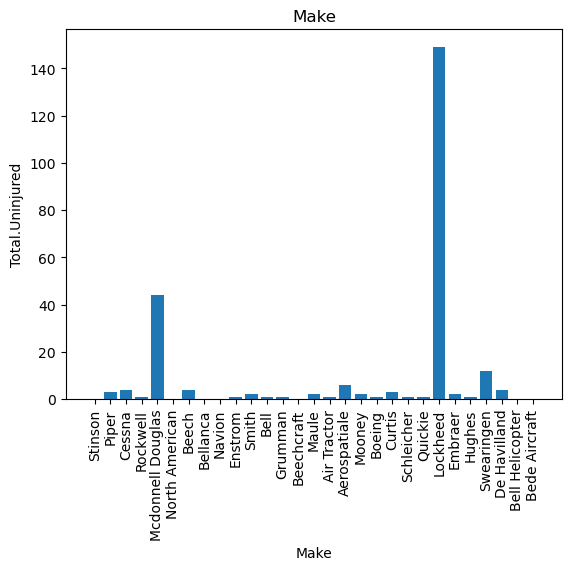

In [30]:
# Challenge 1
# # Create a bar chart using the category counts
plt.bar(clean_df1["Make"].head(100),clean_df1["Total.Uninjured"].head(100))

# Set the title and labels for the chart
plt.title("Make")
plt.xlabel("Make")
plt.ylabel("Total.Uninjured")

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Display the chart
plt.show()


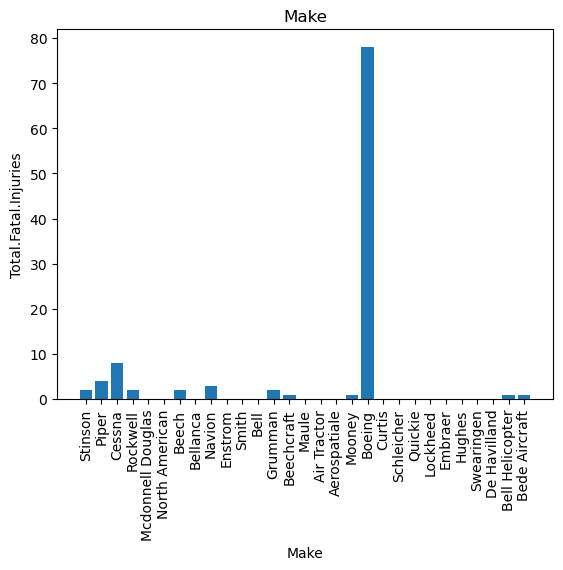

In [31]:
# Challenge 2
# # Create a bar chart using the category counts
plt.bar(clean_df1["Make"].head(100),clean_df1["Total.Fatal.Injuries"].head(100))

# Set the title and labels for the chart
plt.title("Make")
plt.xlabel("Make")
plt.ylabel("Total.Fatal.Injuries")

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Display the chart
plt.show()

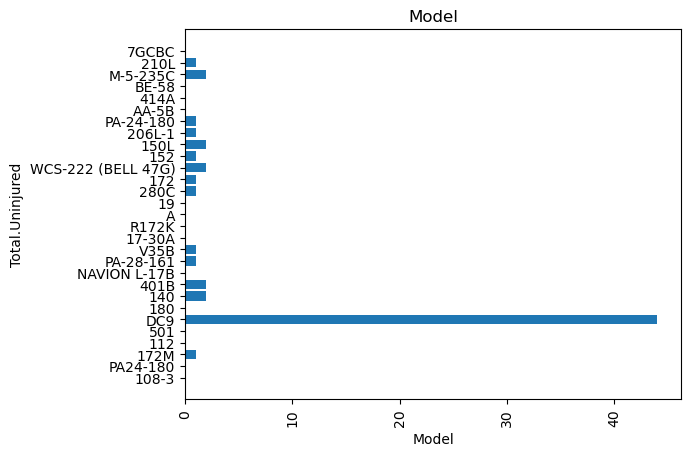

In [32]:
# Challenge 3
# # # Create a bar chart using the category counts
plt.barh(clean_df1["Model"].head(30),clean_df1["Total.Uninjured"].head(30))

# Set the title and labels for the chart
plt.title("Model")
plt.xlabel("Model")
plt.ylabel("Total.Uninjured")

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Display the chart
plt.show()

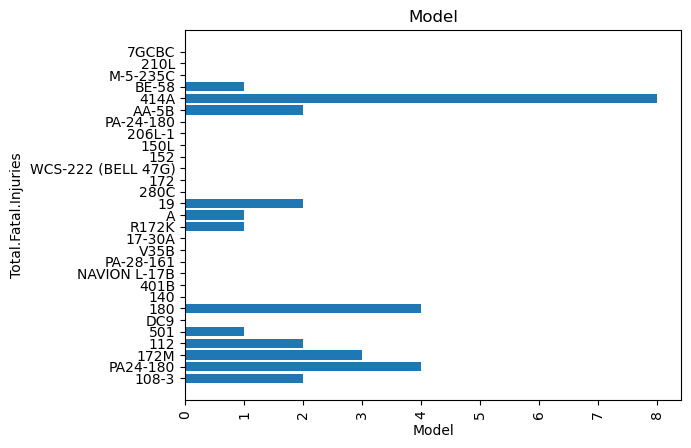

In [33]:
# Challenge 4
# # # Create a bar chart using the category counts
plt.barh(clean_df1["Model"].head(30),clean_df1["Total.Fatal.Injuries"].head(30))

# Set the title and labels for the chart
plt.title("Model")
plt.xlabel("Model")
plt.ylabel("Total.Fatal.Injuries")

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Display the chart
plt.show()

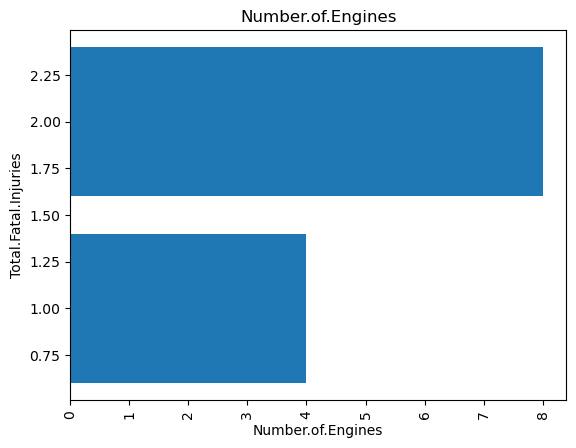

In [34]:
# Challenge 5
# # # Create a bar chart using the category counts
plt.barh(clean_df1["Number.of.Engines"].head(30),clean_df1["Total.Fatal.Injuries"].head(30))

# Set the title and labels for the chart
plt.title("Number.of.Engines")
plt.xlabel("Number.of.Engines")
plt.ylabel("Total.Fatal.Injuries")

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Display the chart
plt.show()

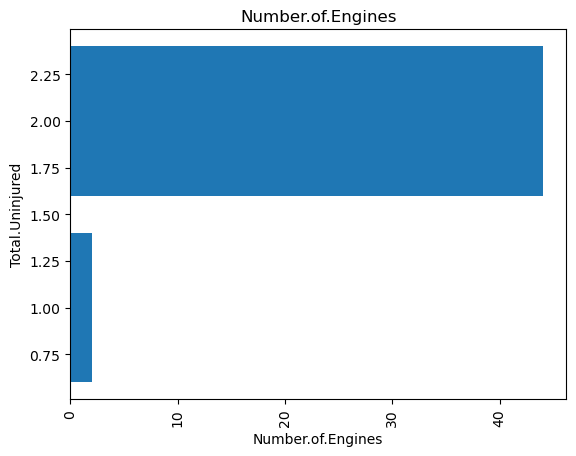

In [35]:
# Challenge 6
# # # Create a bar chart using the category counts
plt.barh(clean_df1["Number.of.Engines"].head(30),clean_df1["Total.Uninjured"].head(30))

# Set the title and labels for the chart
plt.title("Number.of.Engines")
plt.xlabel("Number.of.Engines")
plt.ylabel("Total.Uninjured")

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Display the chart
plt.show()

<h4><b> Linear Regression Analysis </h4>

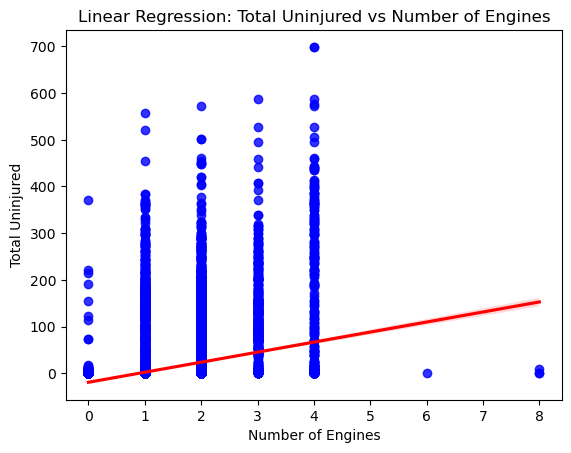

In [36]:
# Challenge 7
# Regression of Number.of.Engines and Total.Uninjured
sns.regplot(x='Number.of.Engines', y='Total.Uninjured', data=clean_df1, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title('Linear Regression: Total Uninjured vs Number of Engines')
plt.xlabel('Number of Engines')
plt.ylabel('Total Uninjured')
plt.show()

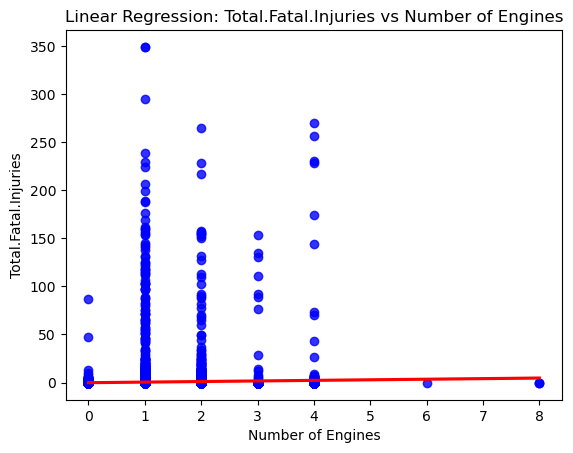

In [37]:
# Challenge 8
# Regression of number.of. Enginess and Total.Fatal.Injuries
sns.regplot(x='Number.of.Engines', y='Total.Fatal.Injuries', data=clean_df1, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title('Linear Regression: Total.Fatal.Injuries vs Number of Engines')
plt.xlabel('Number of Engines')
plt.ylabel('Total.Fatal.Injuries')
plt.show()